<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/chap08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 例題8.1

以下の2クラスのデータの平均ベクトルと共分散行列を求め、識別面を図示せよ。

$\omega_1 = \{(3,4)^T, (3,8)^T, (2,6)^T, (4,6)^T\}$

$\omega_2 = \{(3,0)^T, (1,-2)^T, (5,-2)^T, (3,-4)^T\}$

データの準備と表示

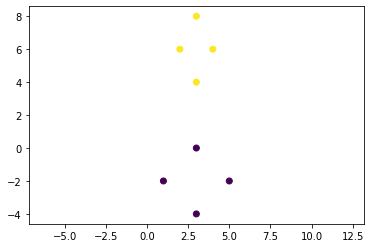

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[3.0, 4.0], [3.0, 8.0], [2.0, 6.0], [4.0, 6.0],
              [3.0, 0.0], [1.0, -2.0], [5.0, -2.0], [3.0, -4.0]])
y = np.array([1, 1, 1, 1, 0, 0, 0, 0])

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.axis('equal')
plt.show()

平均ベクトルと共分散行列を計算

In [2]:
m1 = np.average(X[y==1], axis = 0)
m2 = np.average(X[y==0], axis = 0)
c1 = np.cov(X[y==1], bias=True, rowvar=False)
c2 = np.cov(X[y==0], bias=True, rowvar=False)

識別面の関数をscipyの [multivariate_normal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html) を使って求めます。

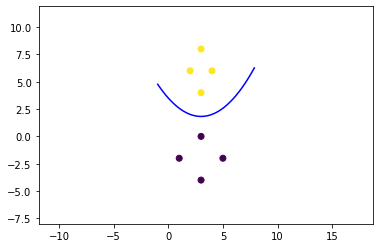

In [3]:
from scipy.stats import multivariate_normal
f = lambda x: multivariate_normal.pdf(x, mean=m1, cov=c1) - multivariate_normal.pdf(x, mean=m2, cov=c2)

x1 = np.arange(-1.0, 8.0, 0.1)
x2 = np.arange(-8.0, 12.0, 0.1)
X1, X2 = np.meshgrid(x1, x2)

Z = f(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.axis('equal')
plt.contour(X1, X2, Z, levels=0, colors="blue")
plt.show()

## 例題8.2

例題8.1で求めた正規分布を3次元でプロットせよ。


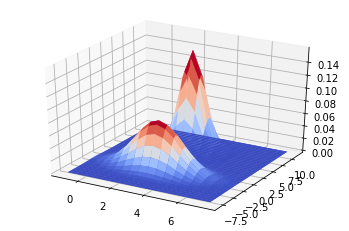

In [4]:
from scipy.stats import multivariate_normal
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = np.arange(-1.0, 8.0, 0.5)
x2 = np.arange(-8.0, 12.0, 0.5)
X1, X2 = np.meshgrid(x1, x2)
 
f1 = lambda x1, x2: multivariate_normal(m1, c1).pdf([x1, x2])
f2 = lambda x1, x2: multivariate_normal(m2, c2).pdf([x1, x2])
 
#配列それぞれ対応するものを返す関数に変える
Z1 = np.vectorize(f1)(X1,X2)
Z2 = np.vectorize(f2)(X1,X2)
 
ax.plot_surface(X1, X2, Z1, rstride=1, cstride=1, cmap=cm.coolwarm)
ax.plot_surface(X1, X2, Z2, rstride=1, cstride=1, cmap=cm.coolwarm)
plt.show()

## 演習問題8-3

学習データを乱数を用いて生成し、scikit-learnの単純ベイズ法 [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) で識別器を学習せよ。学習後のパラメータを確認すること。

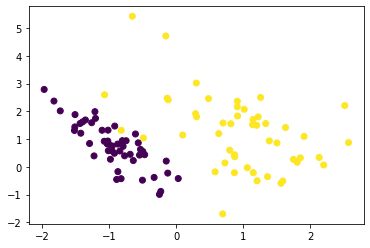

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB

X_train, y_train = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=2)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train)

In [6]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

学習された分布のパラメータ

In [7]:
# 平均
clf.theta_

array([[-0.927878  ,  0.77832179],
       [ 0.93373095,  1.21390406]])

In [8]:
#分散
clf.sigma_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


array([[0.19332632, 0.66148527],
       [0.64538151, 1.70368186]])

## EMアルゴリズムの例題

2つのクラスタからなるランダムなデータを生成し、EMアルゴリズムによって分布のパラメータを求めよ。


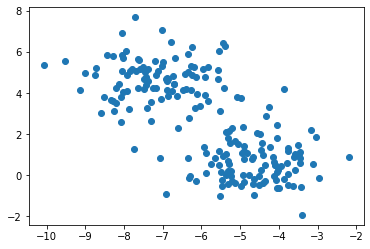

In [9]:
from sklearn.datasets import make_blobs
from sklearn import mixture
from matplotlib.colors import LogNorm

X_train, y_train = make_blobs(n_samples=200, centers=2, n_features=2, random_state=12)
plt.scatter(X_train[:, 0], X_train[:, 1])

In [10]:
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X_train)

GaussianMixture(n_components=2)

学習された分布を表示

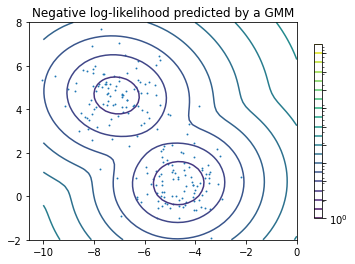

In [11]:
# display predicted scores by the model as a contour plot
x = np.linspace(-10., 0.)
y = np.linspace(-2., 8.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 20))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()